In [8]:
import sys
import os.path
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname(__file__), os.path.pardir)))

NameError: name '__file__' is not defined

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pymarket import Market
from pymarket.bids.demand_curves import demand_curve_from_bids, supply_curve_from_bids
from pymarket.plot import plot_demand_curves

ModuleNotFoundError: No module named 'pymarket.bids'

# Creates new market

In [2]:
mar = Market()
    
mar.accept_bid(1, 6.7, 0, True, 0)
mar.accept_bid(1, 6.6, 1, True, 0)
mar.accept_bid(1, 6.5, 2, True, 0)
mar.accept_bid(1, 6.4, 3, True, 0)
mar.accept_bid(1, 6.3, 4, True, 0)
mar.accept_bid(1, 6, 5, True, 0)

mar.accept_bid(1, 1, 6, False, 0)
mar.accept_bid(1, 2, 7, False, 0)
mar.accept_bid(2, 3, 8, False, 0)
mar.accept_bid(2, 4, 9, False, 0)
mar.accept_bid(1, 6.1, 10, False, 0)

bids = mar.bm.get_df()
transactions, extras = mar.run('huang')
stats = mar.statistics()

    bid  quantity  price  user  buying  time  divisible
0     0         1    6.7     0    True     0       True
1     1         1    6.6     1    True     0       True
2     2         1    6.5     2    True     0       True
3     3         1    6.4     3    True     0       True
4     4         1    6.3     4    True     0       True
5     5         1    6.0     5    True     0       True
6     6         1    1.0     6   False     0       True
7     7         1    2.0     7   False     0       True
8     8         2    3.0     8   False     0       True
9     9         2    4.0     9   False     0       True
10   10         1    6.1    10   False     0       True


## Orignal supply and demand curves

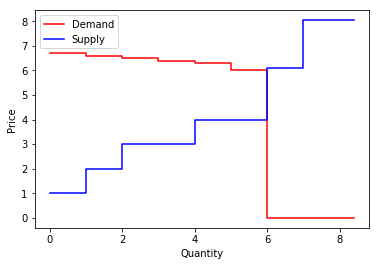

In [3]:
mar.plot()

## Supply and demand curves after market is splitted

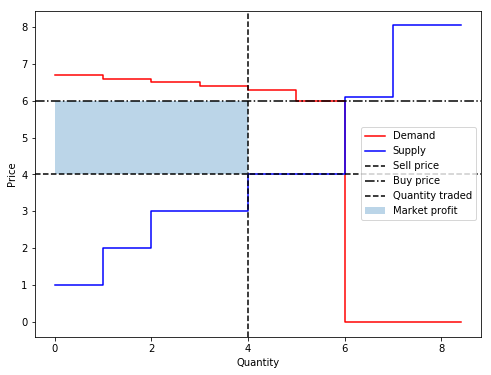

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = mar.plot_method('huang', ax=ax)
fig.savefig('tests/test_images/huang_plot_1.png')

## Analysis of the trade

### Trading price

* Selling Price: 4, defined by bid 9, consequently, 9 does not trade
* Buying Price:  6, defined by bid 5, consequently, 5 does not trade

### Actually trading

* Buying: 0, 1, 2, 3
* Selling: 6, 7, 8

### Results

* Supply and demand have the same size.
* The profit of the market maker coincides with the blue shaded area

# Statistics

In [11]:
print('Percentage of the maximum possible traded quantity')
stats['percentage_traded']

Percentage of the maximum possible traded quantity


0.6666666666659999

In [12]:
print('Percentage of the maximum possible total welfare')
stats['percentage_welfare']

Percentage of the maximum possible total welfare


0.4186046511627907

In [13]:
print('Profits per user')
for u in bids.user.unique():
    print(f'User {u:2} obtained a profit of {stats["profits"]["player_bid"][u]:0.2f}')

Profits per user
User  0 obtained a profit of 0.56
User  1 obtained a profit of 0.48
User  2 obtained a profit of 0.40
User  3 obtained a profit of 0.32
User  4 obtained a profit of 0.24
User  5 obtained a profit of 0.00
User  6 obtained a profit of 3.00
User  7 obtained a profit of 2.00
User  8 obtained a profit of 2.00
User  9 obtained a profit of 0.00
User 10 obtained a profit of 0.00


In [14]:
print(f'Profit to Market Maker was {stats["profits"]["market"]:0.2f}')

Profit to Market Maker was 8.00
